# ĐỒ ÁN MÔN HỌC
## Nhập môn khoa học dữ liệu - CQ2022/21 - Nhóm 2
### Giáo viên hướng dẫn: Thầy Lê Nhựt Nam
### Thành viên thực hiện:
    22120023	Lê Nguyễn Gia Bảo

### Nhập thư viện:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Câu hỏi:
1. Dòng điện thoại nào được quan tâm nhiều nhất từ trước đến nay dựa trên số lượt đánh giá và hỏi đáp?

2. Ứng với mỗi dòng điện thoại thì những mẫu điện thoại nào được quan tâm nhiều nhất (top 3)?


### Khám phá dữ liệu:

#### Đọc dữ liệu từ file CSV:

In [2]:
mobile_df = pd.read_csv('data.csv')
mobile_df.head()

,Tên sản phẩm,Giá mới,Giá cũ,Màu sắc,Các phiên bản bộ nhớ,Thời gian bảo hành,Thông số kỹ thuật,Đánh giá,Số lượt đánh giá và hỏi đáp,Đường dẫn
0,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",1.750.000 ₫,2.950.000₫,"Xám, Trắng, Xanh, Đen, Đỏ","4-64GB, 6-128GB",BH Thường 6 Tháng,"{""Màn hình:"": ""IPS LCD, HDR10, tỷ lệ 19.5:9 \n...",5/5,1190,https://mobilecity.vn/lg/lg-g7-cu.html
1,Điện thoại Xiaomi Redmi 12C (Helio G85),1.950.000 ₫,2.950.000₫,"Xanh Đậm, Xanh bạc hà, Tím, Đen","4-64GB, 4-128GB",BH Thường 12 tháng,"{""Màn hình:"": ""IPS LCD, 500 nits (typ)\n6.71 i...",5/5,5,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...
2,Điện thoại Xiaomi Redmi 13R 5G (Màn hình 90Hz),2.450.000 ₫,3.450.000₫,"Tím, Xanh bạc hà, Đen","4-128GB, 6-128GB",BH Thường 12 Tháng,"{""Màn hình:"": ""IPS LCD, 90Hz, 450 nits (typ), ...",5/5,5,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...
3,Điện thoại Xiaomi Redmi Note 12R (Snapdragon 4...,2.550.000 ₫,2.950.000₫,"Xanh, Bạc, Đen","4-128GB, 6-128GB, 8-128GB",BH Thường 12 Tháng,"{""Màn hình:"": ""IPS LCD, 90Hz, 550 nits\n6.79 i...",5/5,121,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...
4,Điện thoại Xiaomi Redmi 13C Chính hãng (Camera...,2.600.000 ₫,3.450.000₫,"Xanh dương, Xanh lá, Đen xám","4-128GB, 6-128GB, 8-256GB",BH Thường 12 tháng,"{""Màn hình:"": ""IPS LCD, 90Hz, 450 nits (typ), ...",5/5,1,https://mobilecity.vn/dien-thoai/xiaomi-redmi-...


#### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
n_rows = mobile_df.shape[0]
n_cols = mobile_df.shape[1]
print(f"Số dòng: {n_rows}")
print(f"Số cột: {n_cols}")

Số dòng: 1420
Số cột: 10


#### Ý nghĩa của các hàng:
Mỗi hàng là một thể hiện của một mẫu điện thoại xác định được lấy từ tất cả cả mẫu điện thoại trên trang web của **Mobilecity**.

#### Có tồn tại các hàng trùng lặp trong dữ liệu không?

In [4]:
n_duplicated_rows = mobile_df.duplicated().sum()

In [5]:
if n_duplicated_rows == 0:
    print("Không có hàng trùng lặp")
else:
    print(f"Có {n_duplicated_rows} hàng trùng lặp")    

Không có hàng trùng lặp


#### Ý nghĩa của các cột:
Mỗi cột đại diện cho một đặc trưng của điện thoại, gồm:

In [6]:
mobile_df.columns

Index(['Tên sản phẩm', 'Giá mới', 'Giá cũ', 'Màu sắc', 'Các phiên bản bộ nhớ',
       'Thời gian bảo hành', 'Thông số kỹ thuật', 'Đánh giá',
       'Số lượt đánh giá và hỏi đáp', 'Đường dẫn'],
      dtype='object')

#### Kiểu dữ liệu của các cột:

In [7]:
mobile_df.dtypes

Tên sản phẩm                   object
Giá mới                        object
Giá cũ                         object
Màu sắc                        object
Các phiên bản bộ nhớ           object
Thời gian bảo hành             object
Thông số kỹ thuật              object
Đánh giá                       object
Số lượt đánh giá và hỏi đáp     int64
Đường dẫn                      object
dtype: object

#### Các kiểu dữ liệu này có phù hợp để tiếp tục các bước tiếp theo chưa?

Các cột giá nên có kiểu dữ liệu là `float`

In [8]:
def astype_float(col):
    col = str(col).replace('.', '').replace('đ', '').replace('₫', '').strip()
    try:
        return float(col)
    except ValueError:
        return np.nan
    
mobile_df['Giá mới'] = mobile_df['Giá mới'].apply(astype_float)
mobile_df['Giá cũ'] = mobile_df['Giá cũ'].apply(astype_float)

In [9]:
mobile_df.dtypes

Tên sản phẩm                    object
Giá mới                        float64
Giá cũ                         float64
Màu sắc                         object
Các phiên bản bộ nhớ            object
Thời gian bảo hành              object
Thông số kỹ thuật               object
Đánh giá                        object
Số lượt đánh giá và hỏi đáp      int64
Đường dẫn                       object
dtype: object

#### Dữ liệu thiếu:
Dữ liệu thiếu bao gồm cả các ô không có dữ liệu và các ô có dữ liệu là "không có dữ liệu" hoặc "Không có thông số kỹ thuật"

Tính tỉ lệ dữ liệu thiếu của các cột

In [10]:
mobile_df.replace("không có dữ liệu", np.nan, inplace=True)

missing_ratio = (mobile_df.isna().mean() * 100).round(2)

missing_ratio_df = pd.DataFrame(missing_ratio, columns=['Missing_ratio'])

missing_ratio_df

,Missing_ratio
Tên sản phẩm,0.00
Giá mới,27.39
Giá cũ,47.82
Màu sắc,16.34
Các phiên bản bộ nhớ,16.97
Thời gian bảo hành,0.00
Thông số kỹ thuật,0.00
Đánh giá,0.00
Số lượt đánh giá và hỏi đáp,0.00
Đường dẫn,0.00


**Nhận xét:** 
- Tỉ lệ thiếu tập trung ở các cột về giá, màu sắc và phiên bản bộ nhớ.
- Các cột cần để trả lời câu hỏi không xuất hiện dữ liệu thiếu.

### Trả lời câu hỏi:

#### Câu 1: Dòng điện thoại nào được quan tâm nhiều nhất từ trước đến nay dựa trên số lượt đánh giá và hỏi đáp?

- Rút trích ra tất cả các dòng điện thoại từ tất cả tên điện thoại.
- Sử dụng `Dictionary` của Python với keys là tên các dòng điện thoại, values là tên các mẫu điện thoại ứng với mỗi dòng và số lượt đánh giá & hỏi đáp tương ứng.
- Tính tổng số lượt đánh giá và hỏi đáp của từng dòng điện thoại.
- Trực quan hóa bằng biểu đồ cột và đưa ra kết luận.

In [11]:
def extract_phone_model(full_name):
    try:
        # Tìm vị trí của từ "Điện" và "thoại" đầu tiên
        start_index = full_name.index('Điện') + len('Điện')
        end_index = full_name.index('thoại', start_index) + len('thoại')
        model_name_parts = full_name[end_index:].strip().split()
        
        # Kiểm tra từng phần tử trong model_name_parts
        for part in model_name_parts:
            if part.isascii():
                return part
                        
        # Nếu tất cả các phần tử đều là UTF-8, trả về phần tử đầu tiên
        return model_name_parts[0]
    except ValueError:
        return full_name
    
mobile_df['Dòng điện thoại'] = mobile_df['Tên sản phẩm'].apply(extract_phone_model)

In [12]:
phone_models = set(mobile_df['Dòng điện thoại'])
phone_models

{'360',
 'Apple',
 'Arbutus',
 'Asus',
 'BLU',
 'Bkav',
 'BlackBerry',
 'Blackberry',
 'Blackview',
 'Bphone',
 'Fairphone',
 'Freetel',
 'Gionee',
 'Google',
 'HTC',
 'Hero',
 'Honor',
 'Huawei',
 'Infinix',
 'Kashi',
 'LG',
 'LeEco',
 'Leica',
 'Lenovo',
 'Meiigoo',
 'Meizu',
 'Micromax',
 'MoonDrop',
 'Motorola',
 'NIO',
 'Nokia',
 'Nothing',
 'Nubia',
 'OPPO',
 'OnePlus',
 'Oppo',
 'POCO',
 'Pepsi',
 'Philips',
 'Realme',
 'Red',
 'SKY',
 'Samsung',
 'Sky',
 'Smartisan',
 'Sol',
 'Sony',
 'Sugar',
 'Tecno',
 'Ulefone',
 'Unihertz',
 'Vertu',
 'Vivo',
 'Vsmart',
 'Xiaomi',
 'ZTE',
 'game',
 'iPhone',
 'itel'}

In [13]:
phone_dict = {}

for _, phone in mobile_df.iterrows():
    model = phone['Dòng điện thoại']
    name = phone['Tên sản phẩm']
    n_ratings_and_reviews = phone['Số lượt đánh giá và hỏi đáp']

    if model not in phone_dict:
        phone_dict[model] = []

    phone_dict[model].append((name, n_ratings_and_reviews))

In [14]:
phone_dict

{'LG': [('Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)', 1190),
  ('Điện thoại LG V50 ThinQ 5G cũ (Snapdragon 855, màn 2K)', 231),
  ('Điện thoại LG V50S ThinQ 5G cũ (Snapdragon 855, Sạc 21W)', 806),
  ('Điện thoại LG G8 ThinQ Cũ (Snapdragon 855, màn P-OLED 2K)', 1090),
  ('Điện thoại LG V40 ThinQ cũ (Snapdragon 845, Màn P-OLED 2K)', 614),
  ('Điện thoại LG Velvet 5G cũ (Snapdragon 845/Snapdragon 765G)', 68),
  ('Điện thoại LG V60 ThinQ 5G Cũ (Snapdragon 865 5G)', 356)],
 'Xiaomi': [('Điện thoại Xiaomi Redmi 12C (Helio G85)', 5),
  ('Điện thoại Xiaomi Redmi 13R 5G (Màn hình 90Hz)', 5),
  ('Điện thoại Xiaomi Redmi Note 12R (Snapdragon 4 Gen 2)', 121),
  ('Điện thoại Xiaomi Redmi 13C Chính hãng (Camera 50MP)', 1),
  ('Điện thoại Xiaomi POCO C65 (Camera 50MP)', 8),
  ('Điện thoại Xiaomi Redmi 12 5G (Snapdragon 4 Gen 2)', 28),
  ('Điện thoại Xiaomi Redmi Note 12 5G (Snapdragon 4 Gen 1)', 9),
  ('Điện thoại Xiaomi Redmi 14C Chính hãng (Helio G81Ultra) siêu rẻ', 0),
  ('Điện thoại Xiaomi Redmi N

In [15]:
model_n_ratings_and_reviews = {model: sum([x[1] for x in phones]) for model, phones in phone_dict.items()}

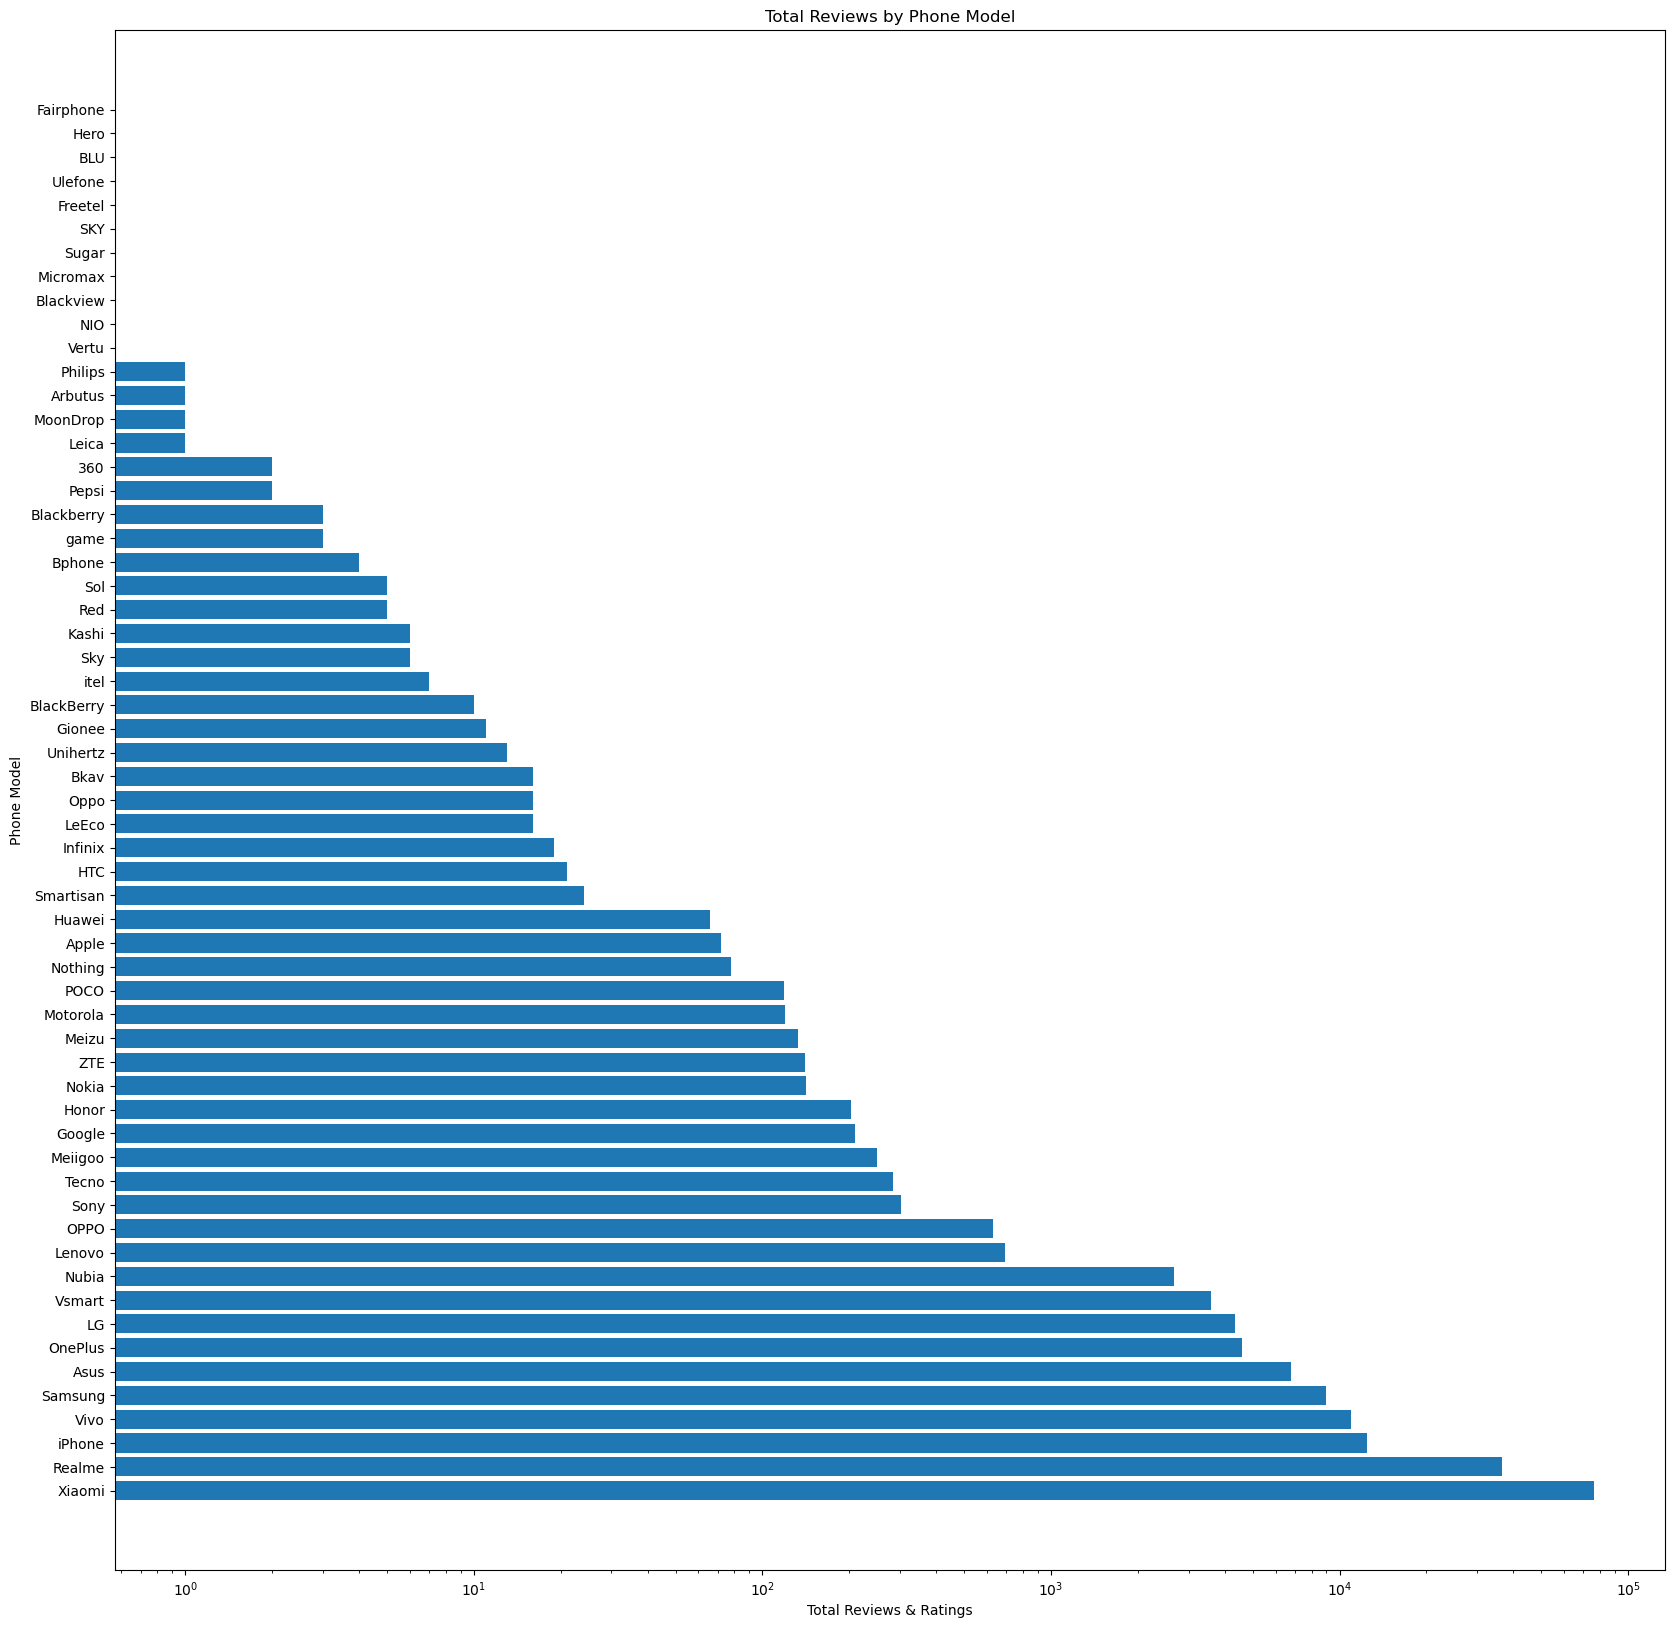

In [16]:
# Chuyển đổi dictionary thành Series để sử dụng phương thức sort_values
model_n_ratings_and_reviews = pd.DataFrame(list(model_n_ratings_and_reviews.items()), columns=['Phone Model', 'Total Reviews & Ratings'])

# Sắp xếp từ thấp đến cao
model_n_ratings_and_reviews = model_n_ratings_and_reviews.sort_values(by='Total Reviews & Ratings', ascending=False)

# Tạo biểu đồ cột ngang
fig, ax = plt.subplots(figsize=(20, 20))
ax.barh(model_n_ratings_and_reviews['Phone Model'], model_n_ratings_and_reviews['Total Reviews & Ratings'])
ax.set_xscale('log')
ax.set_xlabel('Total Reviews & Ratings')
ax.set_ylabel('Phone Model')
ax.set_title('Total Reviews by Phone Model')
plt.show()

##### Kết luận:
Dựa vào dữ liệu và biểu đồ, ta có thể rút ra những phân tích sau:

1. **Dòng điện thoại được quan tâm nhiều nhất**:
   - **Xiaomi** là thương hiệu được quan tâm nhất, với **76,356 lượt đánh giá và hỏi đáp**, vượt trội so với các thương hiệu khác. Điều này cho thấy dòng sản phẩm của Xiaomi phổ biến và nhận được sự quan tâm lớn từ người dùng.
   - Tiếp theo là **Realme** với 36,620 lượt, cũng cho thấy sức hút đáng kể, đặc biệt ở phân khúc giá rẻ và tầm trung.

2. **Các thương hiệu lớn khác**:
   - **Samsung** (9,007 lượt), **Vivo** (10,989 lượt), và **iPhone (Apple)** (12,482 lượt) cũng có lượng đánh giá cao, thể hiện độ phổ biến của các dòng sản phẩm.
   - **OnePlus** và **Asus** cũng được chú ý với lượt đánh giá trong khoảng từ 4,000 đến 7,000.

3. **Thương hiệu ít được quan tâm**:
   - Các thương hiệu như **Hero**, **BLU**, **Fairphone**, **Micromax**, **Sugar**, và **Vertu** không có hoặc rất ít lượt đánh giá, cho thấy mức độ quan tâm cực kỳ thấp hoặc dòng sản phẩm không phổ biến.

4. **Kết luận**:
   - **Xiaomi**, **Realme**, **Samsung**, **Vivo**, và **Apple** là các thương hiệu dẫn đầu về mức độ quan tâm của người tiêu dùng, dựa trên số lượt đánh giá và hỏi đáp.
   - Những thương hiệu ít hoặc không được đánh giá thường rơi vào các dòng sản phẩm kém phổ biến, có thể do phân khúc thị trường hẹp hoặc chiến lược marketing yếu.

#### Câu 2: Ứng với mỗi dòng điện thoại thì những mẫu điện thoại nào được quan tâm nhiều nhất (top 3)?

- Loại bỏ các dòng điện thoại có ít hơn 5 mẫu điện thoại.
- Ứng với từng dòng điện thoại, chọn ra top 5 mẫu điện thoại có tổng số lượt đánh giá & hỏi đáp cao nhất.
- Trực quan hóa bằng dataframe.

In [17]:
# Loại bỏ các dòng điện thoại có ít hơn 5 mẫu điện thoại
filtered_phone_dict = {model: phones for model, phones in phone_dict.items() if len(phones) >= 3}

print(len(set(filtered_phone_dict.keys())))

# Với mỗi dòng điện thoại, chọn ra 3 mẫu điện thoại có số lượt đánh giá và hỏi đáp cao nhất
filtered_phone_dict = {model: sorted(phones, key=lambda x: x[1], reverse=True)[:3] for model, phones in filtered_phone_dict.items()}

# Tạo DataFrame từ filtered_phone_dict
filtered_phone_df = pd.DataFrame([(model, phone[0], phone[1]) for model, phones in filtered_phone_dict.items() for phone in phones], columns=['Phone Model', 'Phone Name', 'Total Reviews & Ratings'])

35


In [20]:
filtered_phone_df

,Phone Model,Phone Name,Total Reviews & Ratings
0,LG,"Điện thoại LG G7 ThinQ cũ (Mỹ, Hàn Quốc)",1190
1,LG,"Điện thoại LG G8 ThinQ Cũ (Snapdragon 855, màn...",1090
2,LG,Điện thoại LG V50S ThinQ 5G cũ (Snapdragon 855...,806
3,Xiaomi,Điện thoại Xiaomi Redmi K20 Pro (Snap 855),5490
4,Xiaomi,Điện thoại Xiaomi Redmi Note 8 Pro (Helio G90T),4730
...,...,...,...
100,BlackBerry,Điện thoại BlackBerry Z30,1
101,BlackBerry,Điện thoại BlackBerry Passport Bản Pháp,1
102,Blackberry,Điện thoại Blackberry Q10 Chính Hãng,2
103,Blackberry,Điện thoại Blackberry Passport Silver Edition,1


##### Lưu vào file CSV:

In [21]:
filtered_phone_df.to_csv('DataAnalyzing_22120023.csv', index=False)